# <center>Artificial Intelligence II: HW1 / Fall Semester 2021 - 2022</center>
## <center>Μαραγκοζάκης Γεώργιος - 1115201500089</center>

# Do all the necessary imports for this notebook


In [26]:
import pandas as pd
import numpy as np

# vectorization
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# classification
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, accuracy_score, \
                            precision_score, recall_score, f1_score, roc_curve, auc,\
                            roc_auc_score, plot_roc_curve
                          
# learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Dataset Preprocessing

In [27]:
trainDf = pd.read_csv('./vaccine_train_set.csv')
trainDf

,Unnamed: 0,tweet,label
0,0,Sip N Shop Come thru right now #Marjais #Popul...,0
1,1,I don't know about you but My family and I wil...,1
2,2,@MSignorile Immunizations should be mandatory....,2
3,3,President Obama spoke in favor of vaccination ...,0
4,4,"""@myfoxla: Arizona monitoring hundreds for mea...",0
...,...,...,...
15971,15971,@Salon if u believe the anti-vax nutcases caus...,1
15972,15972,How do you feel about parents who don't #vacci...,0
15973,15973,70 Preschoolers Tested for Measles in Simi Val...,0
15974,15974,Finance Minister: Budget offers room to procur...,0


### Will be replaced by test set

In [28]:
validDf = pd.read_csv('./vaccine_validation_set.csv')
validDf

,Unnamed: 0,tweet,label
0,0,@user They had a massive surge in with covid d...,1
1,1,Required vaccines for school: Parents and guar...,0
2,2,“@KCStar: Two more Johnson County children hav...,0
3,3,NV can do better. Which states are the best (a...,2
4,4,Nothing like killing ourselves w/ our own fear...,2
...,...,...,...
2277,2277,RT @abc7: Number of measles cases reported in ...,0
2278,2278,"Evidence points to the idea that ""measles affe...",0
2279,2279,"Where's @SavedYouAClick ""@voxdotcom: Why you s...",2
2280,2280,Some of my favorite people have autism. If tha...,2


- ### *Convert all comments to lower case*

In [29]:
trainDf['tweet'] = trainDf['tweet'].str.lower()
trainDf

,Unnamed: 0,tweet,label
0,0,sip n shop come thru right now #marjais #popul...,0
1,1,i don't know about you but my family and i wil...,1
2,2,@msignorile immunizations should be mandatory....,2
3,3,president obama spoke in favor of vaccination ...,0
4,4,"""@myfoxla: arizona monitoring hundreds for mea...",0
...,...,...,...
15971,15971,@salon if u believe the anti-vax nutcases caus...,1
15972,15972,how do you feel about parents who don't #vacci...,0
15973,15973,70 preschoolers tested for measles in simi val...,0
15974,15974,finance minister: budget offers room to procur...,0


In [30]:
validDf['tweet'] = validDf['tweet'].str.lower()
validDf

,Unnamed: 0,tweet,label
0,0,@user they had a massive surge in with covid d...,1
1,1,required vaccines for school: parents and guar...,0
2,2,“@kcstar: two more johnson county children hav...,0
3,3,nv can do better. which states are the best (a...,2
4,4,nothing like killing ourselves w/ our own fear...,2
...,...,...,...
2277,2277,rt @abc7: number of measles cases reported in ...,0
2278,2278,"evidence points to the idea that ""measles affe...",0
2279,2279,"where's @savedyouaclick ""@voxdotcom: why you s...",2
2280,2280,some of my favorite people have autism. if tha...,2


- ### *Delete all punctuation, urls  and characters like “\n”, “\u0111”*

Πάρθηκαν ιδέες και παραδείγματα από τα παρακάτω link:

url detection from https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
/+a-z0-9 detection from https://stackoverflow.com/questions/37813152/replace-words-starting-with-a-backslash-in-python
rest /+ and punctuation from https://stackoverflow.com/questions/21672514/replacing-punctuation-in-a-data-frame-based-on-punctuation-list

In [31]:
trainDf['tweet'] = trainDf['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', regex=True)
trainDf['tweet'] = trainDf['tweet'].str.replace(r'\\+\w+', '', regex=True)
trainDf['tweet'] = trainDf['tweet'].str.replace('[^\w\s]', '', regex=True)
trainDf

,Unnamed: 0,tweet,label
0,0,sip n shop come thru right now marjais popular...,0
1,1,i dont know about you but my family and i will...,1
2,2,msignorile immunizations should be mandatory p...,2
3,3,president obama spoke in favor of vaccination ...,0
4,4,myfoxla arizona monitoring hundreds for measle...,0
...,...,...,...
15971,15971,salon if u believe the antivax nutcases caused...,1
15972,15972,how do you feel about parents who dont vaccina...,0
15973,15973,70 preschoolers tested for measles in simi val...,0
15974,15974,finance minister budget offers room to procure...,0


In [32]:
validDf['tweet'] = validDf['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', regex=True)
validDf['tweet'] = validDf['tweet'].str.replace(r'\\+\w+', '', regex=True)
validDf['tweet'] = validDf['tweet'].str.replace('[^\w\s]', '', regex=True)
validDf

,Unnamed: 0,tweet,label
0,0,user they had a massive surge in with covid de...,1
1,1,required vaccines for school parents and guard...,0
2,2,kcstar two more johnson county children have m...,0
3,3,nv can do better which states are the best and...,2
4,4,nothing like killing ourselves w our own fear ...,2
...,...,...,...
2277,2277,rt abc7 number of measles cases reported in ca...,0
2278,2278,evidence points to the idea that measles affec...,0
2279,2279,wheres savedyouaclick voxdotcom why you should...,2
2280,2280,some of my favorite people have autism if that...,2


## __Learning Curves__

Πάρθηκαν ιδέες και παραδείγματα από τα παρακάτω link:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

Επιπλέον, η επιλογή το scoring f1_weighted έγινε από τα σχόλια συναδέλφων στο piazza.

In [33]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    cv=5,
    n_jobs=None,
    train_sizes=[100, 250, 500, 1000, 2000, 4000, 8000],
):
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    itrain_sizes, train_scores, validation_scores = learning_curve(
    estimator = estimator,
    X = X,
    y = y, train_sizes = train_sizes, cv = cv,
    scoring='f1_weighted')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(validation_scores, axis=1)
    test_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt

## __Classification__

In [34]:
def SoftmaxRegression(trainX, trainY, testX, testY, labelEncoder):
    """
    Classify the text using the Softmax Regression classifier of scikit-learn    
    """

    softReg = LogisticRegression(multi_class = 'multinomial', max_iter=1000, solver = 'lbfgs')
    softReg.fit(trainX,trainY)
    
    # Predict test set
    predY = softReg.predict(testX)
    return softReg, predY

## __Precision__

In [35]:
def precision(y_true, y_pred):
  return precision_score(y_true, y_pred, average='weighted')

## __Recall__

In [36]:
def recall(y_true, y_pred):
  return recall_score(y_true, y_pred, average='weighted')

## __F-measure__

In [37]:
def fMeasure(y_true, y_pred):
  return f1_score(y_true, y_pred, average='weighted')

## __Vectorization__

In [38]:
# build label encoder for Insults
le = preprocessing.LabelEncoder()
le.fit(trainDf['label'])

# transform Insults into numbers
trainY = le.transform(trainDf['label'])
validY = le.transform(validDf['label'])

evaluation = dict()

- #### Bag-of-words vectorization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

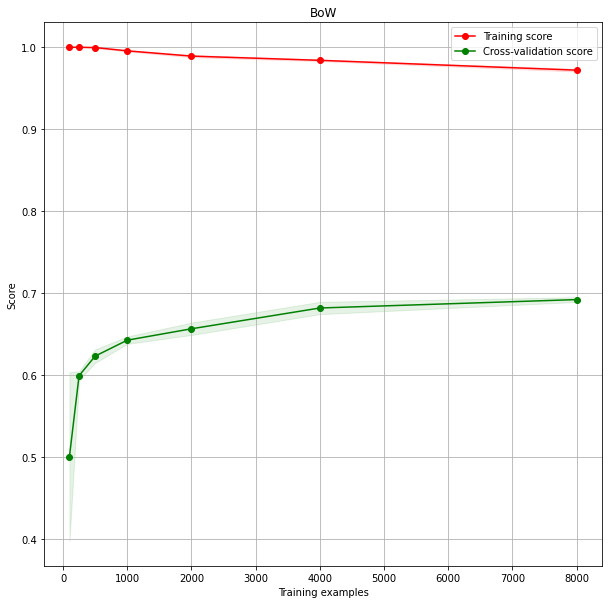

In [39]:
bowVectorizer = CountVectorizer()

trainX = bowVectorizer.fit_transform(trainDf['tweet'])
validX = bowVectorizer.transform(validDf['tweet'])

softReg, predY = SoftmaxRegression(trainX, trainY, validX, validY, le)
evaluation["BOW-Precision"] = precision(validY, predY)
evaluation["BOW-Recall"] = precision(validY, predY)
evaluation["BOW-FMeasure"] = precision(validY, predY)

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
title = "BoW"
plot_learning_curve(
  softReg, title, trainX, trainY, axes=axes, n_jobs=4
)


- #### HashingVectorizer

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

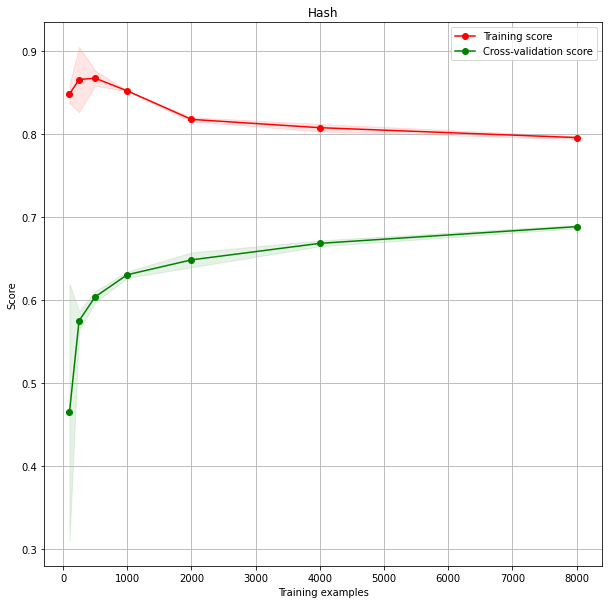

In [40]:
hashVectorizer = HashingVectorizer()

trainX = hashVectorizer.fit_transform(trainDf['tweet'])
validX = hashVectorizer.transform(validDf['tweet'])

softReg, predY = SoftmaxRegression(trainX, trainY, validX, validY, le)
evaluation["Hash-Precision"] = precision(validY, predY)
evaluation["Hash-Recall"] = precision(validY, predY)
evaluation["Hash-FMeasure"] = precision(validY, predY)

fig, axes2 = plt.subplots(1, 1, figsize=(10, 10))
title = "Hash"
plot_learning_curve(
  softReg, title, trainX, trainY, axes=axes2, n_jobs=4
)

- #### Tf-idf vectorization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

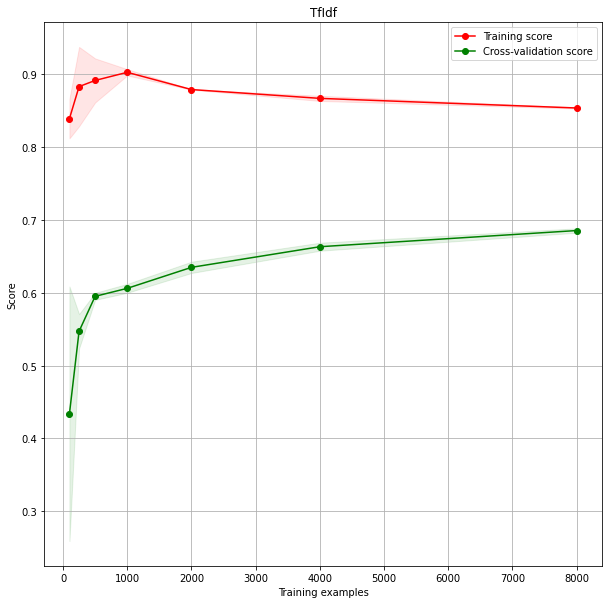

In [41]:
tfIdfVectorizer = TfidfVectorizer()

trainX = tfIdfVectorizer.fit_transform(trainDf['tweet'])
validX = tfIdfVectorizer.transform(validDf['tweet'])

softReg, predY = SoftmaxRegression(trainX, trainY, validX, validY, le)
evaluation["Tfidf-Precision"] = precision(validY, predY)
evaluation["Tfidf-Recall"] = precision(validY, predY)
evaluation["Tfidf-FMeasure"] = precision(validY, predY)

fig, axes3 = plt.subplots(1, 1, figsize=(10, 10))
title = "TfIdf"
plot_learning_curve(
  softReg, title, trainX, trainY, axes=axes3, n_jobs=4
)

## __Validation Scores__

In [42]:
resultsData = {r'Softmax Regression': ['Bag Of Words - Count Vectorizer', 'Hashing Vectorizer', 'TF-ID FVectorizer'],  
               'Precision': [evaluation['BOW-Precision'], evaluation['Hash-Precision'], evaluation['Tfidf-Precision']],
               'Recall': [evaluation['BOW-Recall'], evaluation['Hash-Recall'], evaluation['Tfidf-Recall']],
               'F1 Measure': [evaluation['BOW-FMeasure'], evaluation['Hash-FMeasure'], evaluation['Tfidf-FMeasure']]}
resultsDataFrame = pd.DataFrame(data=resultsData)
resultsDataFrame

,Softmax Regression,Precision,Recall,F1 Measure
0,Bag Of Words - Count Vectorizer,0.709290,0.709290,0.709290
1,Hashing Vectorizer,0.706896,0.706896,0.706896
2,TF-ID FVectorizer,0.713261,0.713261,0.713261
